In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [7]:
Data = pd.read_csv('/content/loan_sanction_test.csv')

In [13]:
# This is to view the first 5 rows of the data set.
Data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [62]:
# Since we dont need the Loan_ID column we will remove it
Data = Data.drop('Loan_ID', axis=1)

In [63]:
# This is to view the information of the dataset.
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 356 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            356 non-null    object 
 2   Dependents         356 non-null    object 
 3   Education          356 non-null    object 
 4   Self_Employed      356 non-null    object 
 5   ApplicantIncome    356 non-null    float64
 6   CoapplicantIncome  356 non-null    float64
 7   LoanAmount         356 non-null    float64
 8   Loan_Amount_Term   356 non-null    float64
 9   Credit_History     356 non-null    float64
 10  Property_Area      356 non-null    object 
dtypes: float64(5), object(6)
memory usage: 33.4+ KB


In [64]:
# To remove duplicate values
Data = Data.drop_duplicates()

In [65]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             354 non-null    object 
 1   Married            354 non-null    object 
 2   Dependents         354 non-null    object 
 3   Education          354 non-null    object 
 4   Self_Employed      354 non-null    object 
 5   ApplicantIncome    354 non-null    float64
 6   CoapplicantIncome  354 non-null    float64
 7   LoanAmount         354 non-null    float64
 8   Loan_Amount_Term   354 non-null    float64
 9   Credit_History     354 non-null    float64
 10  Property_Area      354 non-null    object 
dtypes: float64(5), object(6)
memory usage: 33.2+ KB


In [66]:
Data.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [67]:
# Since we cannot assume the gender as it will impact our analysis so we will drop the null values of gender.
Data = Data.dropna(subset=['Gender'])

<Axes: >

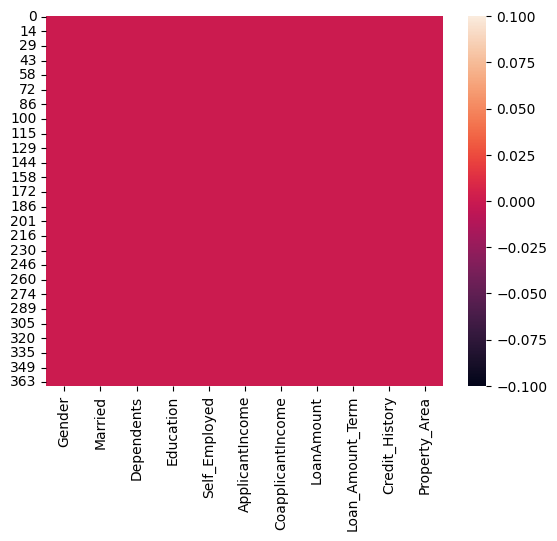

In [68]:
# This is to draw the heat map for visual representation of null values
sns.heatmap(Data.isnull())

In [69]:
# Find the mode of the 'Dependents' column
mode_dependents = Data['Dependents'].mode()[0]

In [70]:
mode_dependents

'0'

In [71]:
# Replace null values with the mode
Data['Dependents'].fillna(mode_dependents, inplace=True)

<ipython-input-71-416129705331>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [72]:
# Check if null values are filled
Data.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [73]:
# Find the mode of the 'Self_Employed' column
mode_self_employed = Data['Self_Employed'].mode()[0]

In [74]:
mode_self_employed

'No'

In [75]:
# Replace null values with the mode
Data['Self_Employed'].fillna(mode_self_employed, inplace=True)

<ipython-input-75-0a75ea723a46>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [76]:
# Check if null values are filled
Data.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [77]:
# Calculate the median of the 'LoanAmount' column
median_loan_amount = Data['LoanAmount'].median()

In [78]:
median_loan_amount

126.0

In [79]:
# Replace null values with the median
Data['LoanAmount'].fillna(median_loan_amount, inplace=True)

<ipython-input-79-dff0340b222d>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [80]:
# Check if null values are filled
Data.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [81]:
# Calculate the median of the 'Loan_Amount_Term' column
median_loan_amount_term = Data['Loan_Amount_Term'].median()
median_loan_amount_term

360.0

In [82]:
# Replace null values with the median
Data['Loan_Amount_Term'].fillna(median_loan_amount_term, inplace=True)

<ipython-input-82-971b0290cff9>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [83]:
# Check if null values are filled
Data.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [84]:
# Calculate the median of the 'Credit_History' column
median_credit_history = Data['Credit_History'].median()
median_credit_history

1.0

In [85]:
# Replace null values with the median
Data['Credit_History'].fillna(median_credit_history, inplace=True)

<ipython-input-85-609c6c2afe60>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [86]:
# Check if null values are filled
Data.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


<Axes: >

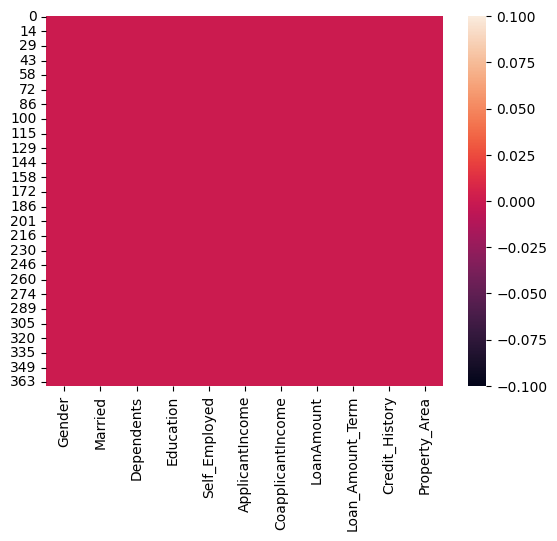

In [87]:
# This heatmap shows that there are no longer any null values in the dataset
sns.heatmap(Data.isnull())

In [88]:
#This comand will show the mean, median, standerd deviation and etc. of the dataset.
Data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,354.000000,354.000000,354.000000,354.000000,354.000000
mean,4242.156780,1431.909605,132.143715,342.700565,0.838983
std,1939.782959,1605.983688,47.275276,65.188379,0.368067
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2869.750000,0.000000,100.250000,360.000000,1.000000
50%,3788.500000,1054.000000,126.000000,360.000000,1.000000
75%,5053.750000,2437.250000,158.000000,360.000000,1.000000
max,8380.750000,6059.375000,243.875000,480.000000,1.000000


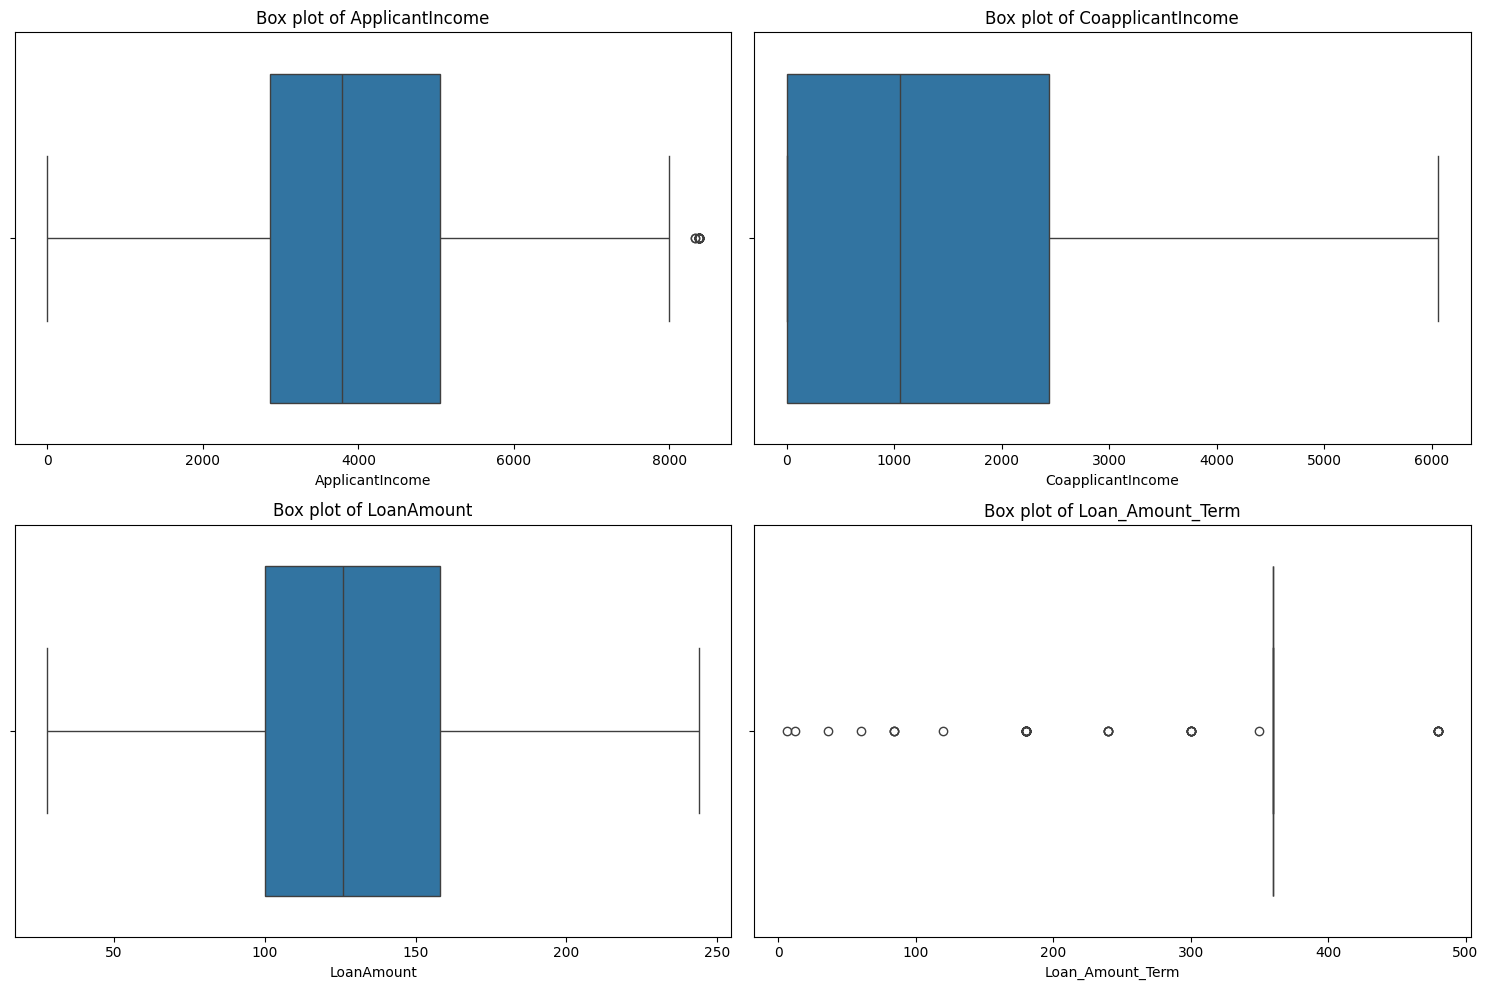

In [89]:
# Identify outliers using box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=Data[col])
    plt.title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

In [90]:
# Function to handle outliers using IQR method
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

In [91]:
# Apply outlier handling to specific columns
for col in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
    Data = handle_outliers_iqr(Data, col)

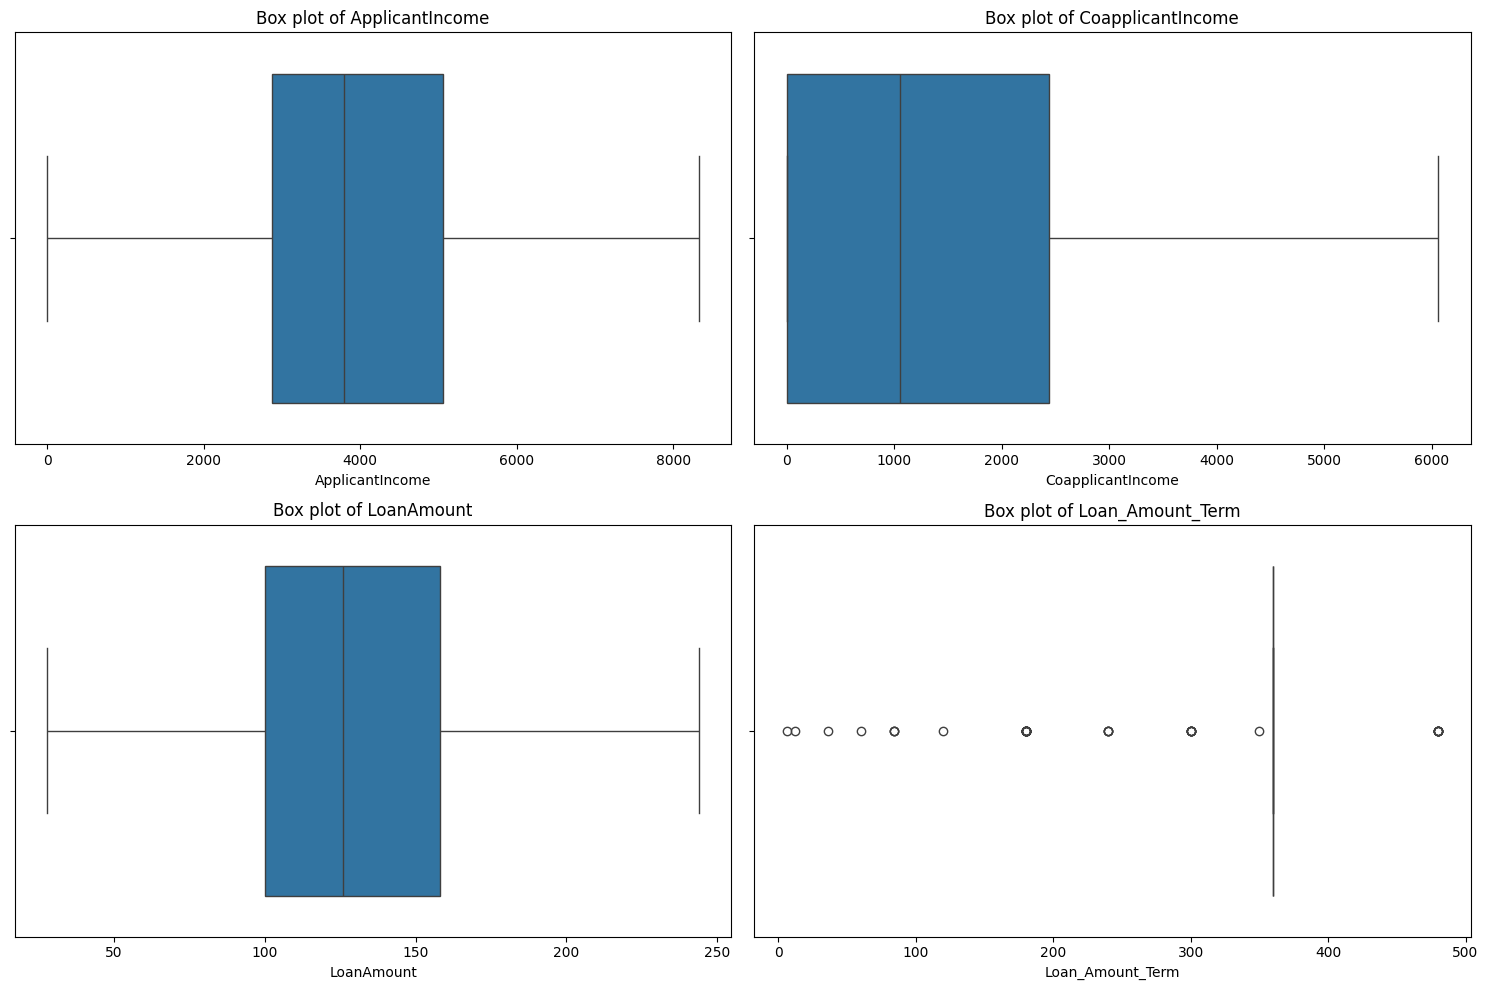

In [92]:
# Visualize the box plots again to see if outliers have been handled
plt.figure(figsize=(15, 10))
for i, col in enumerate(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=Data[col])
    plt.title(f'Box plot of {col}')

plt.tight_layout()
plt.show()


**Since we have handled the missing values and the outlies int he data set we can proceed the the univariate analysis.**

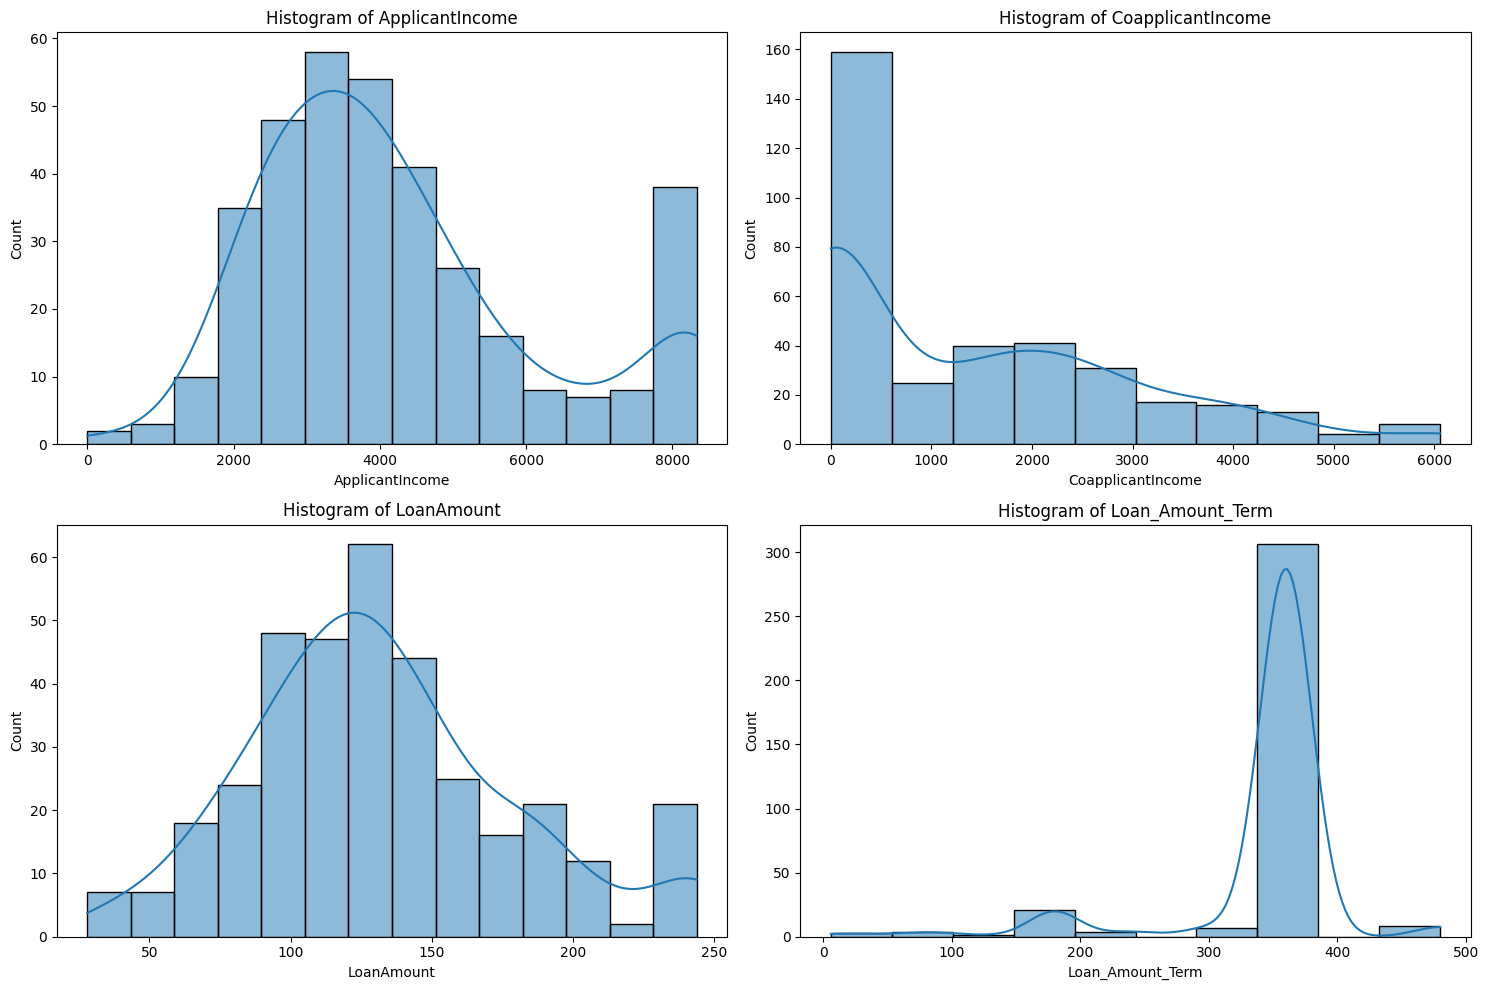

In [93]:
# Histograms for numeric variables
plt.figure(figsize=(15, 10))

for i, col in enumerate(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']):
  plt.subplot(2, 2, i + 1)
  sns.histplot(Data[col], kde=True)  # Include KDE for density estimation
  plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

# Insights from histograms:
# - Distribution shape:  Identify if the data is normally distributed, skewed, or has multiple peaks.
# - Central tendency:  Get a sense of the mean or median of the data.
# - Spread: Understand the range and variability of the data.
# - Outliers:  Visually check if there are any extreme values that might require further investigation.

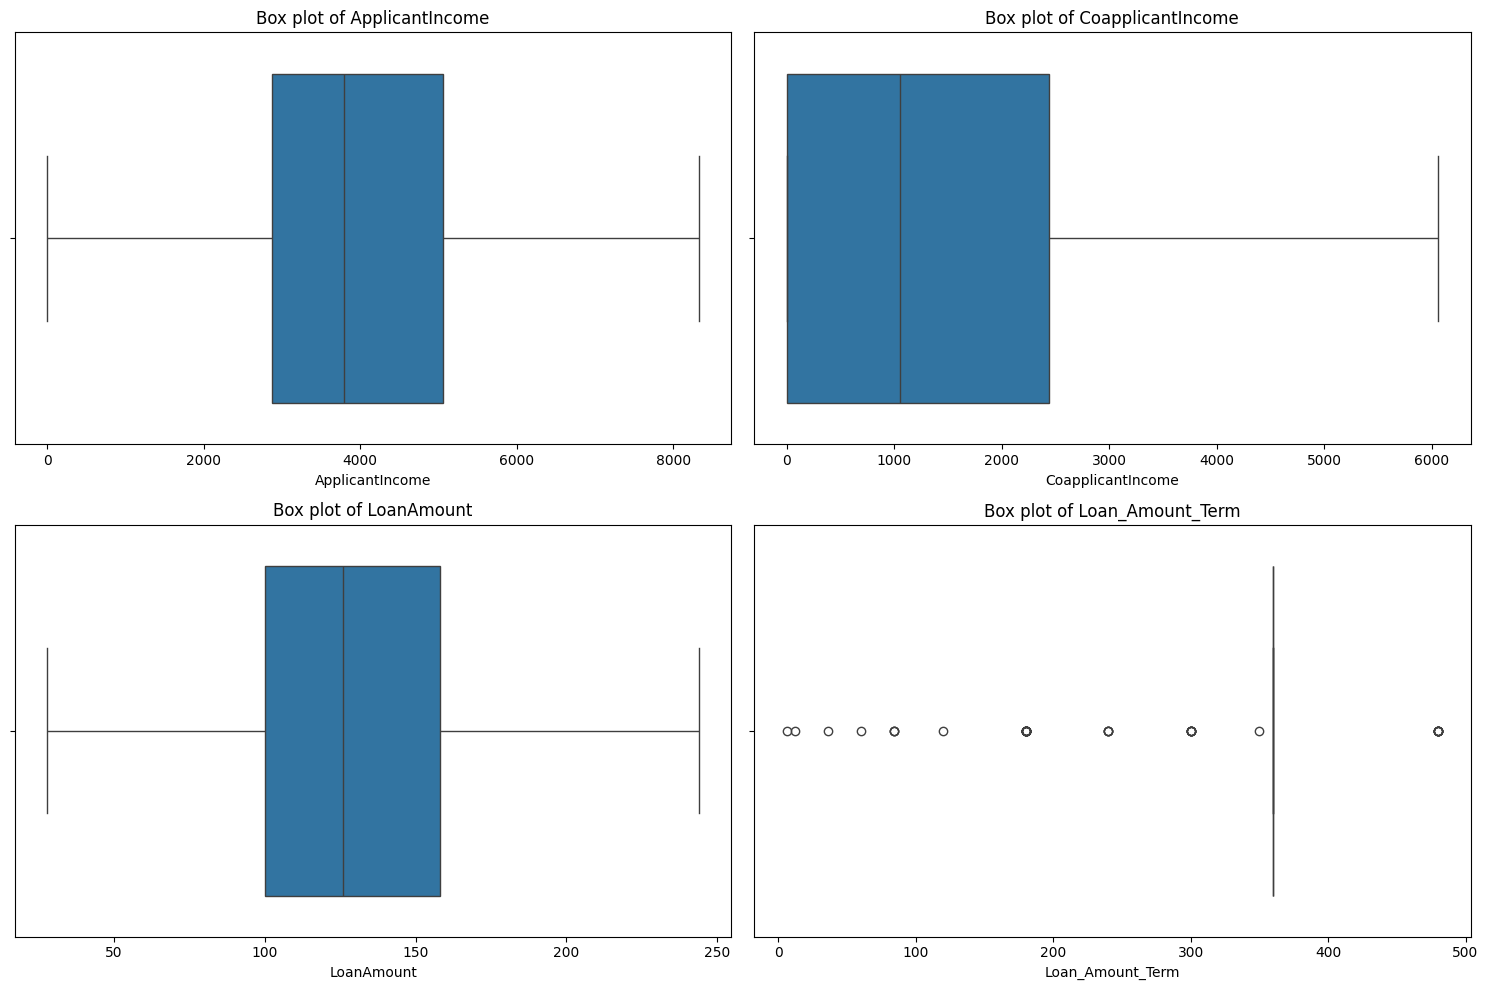

In [94]:
# Box plot for numaric values
plt.figure(figsize=(15, 10))
for i, col in enumerate(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=Data[col])
    plt.title(f'Box plot of {col}')

plt.tight_layout()
plt.show()
# Insights from box plots:
# - Median:  Locate the central value of the data.
# - Interquartile Range (IQR):  Understand the spread of the middle 50% of the data.
# - Whiskers: See the range of data excluding outliers.
# - Outliers: Identify potential extreme values that may be errors or require attention.

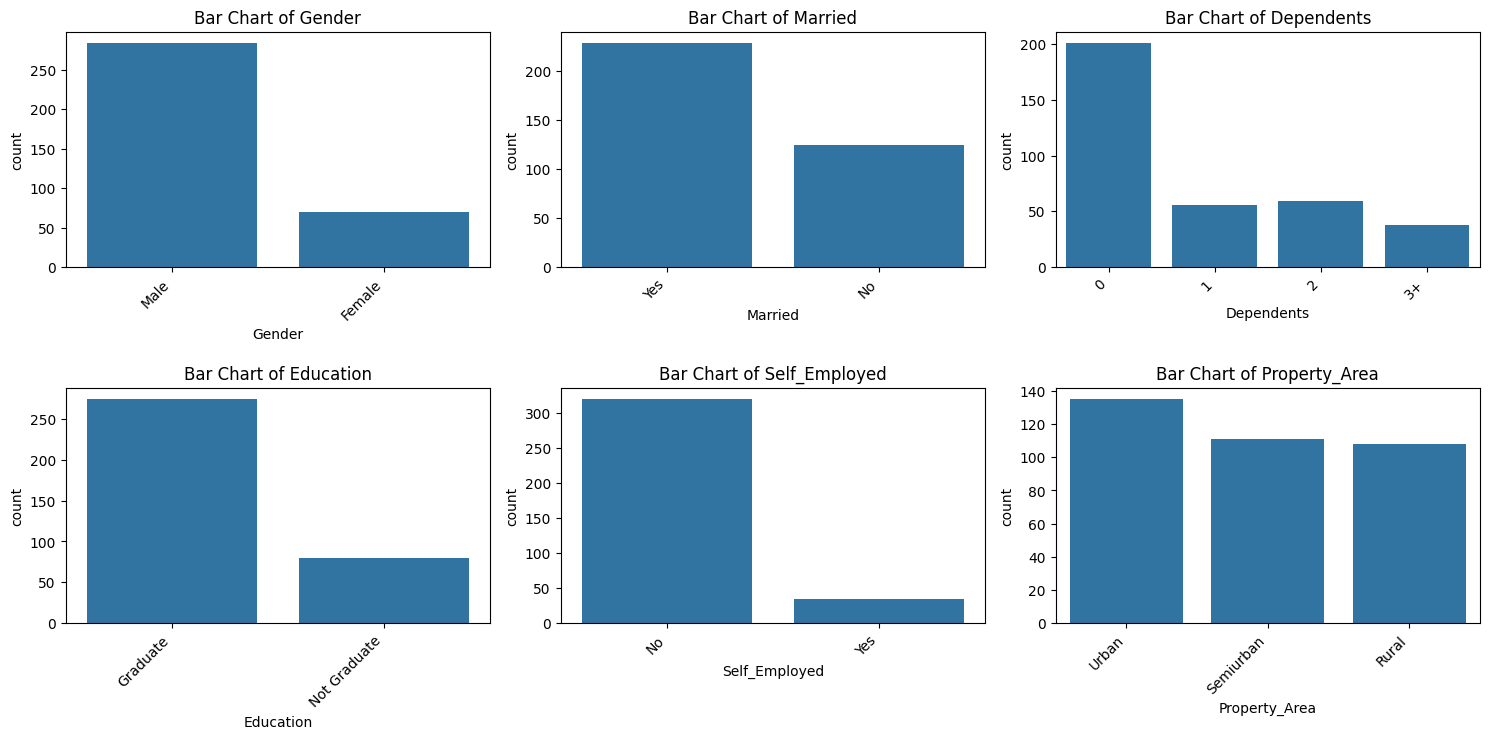

In [95]:
# Bar Charts for categorical variables
plt.figure(figsize=(15, 10))

for i, col in enumerate(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']):
  plt.subplot(3, 3, i + 1)
  sns.countplot(x=Data[col])
  plt.title(f'Bar Chart of {col}')
  plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

# Insights from bar charts:
# - Frequency: Understand the count of each category within the variable.
# - Dominant categories: Identify the most frequent or prevalent categories.
# - Rare categories: Notice if any categories have very few observations.

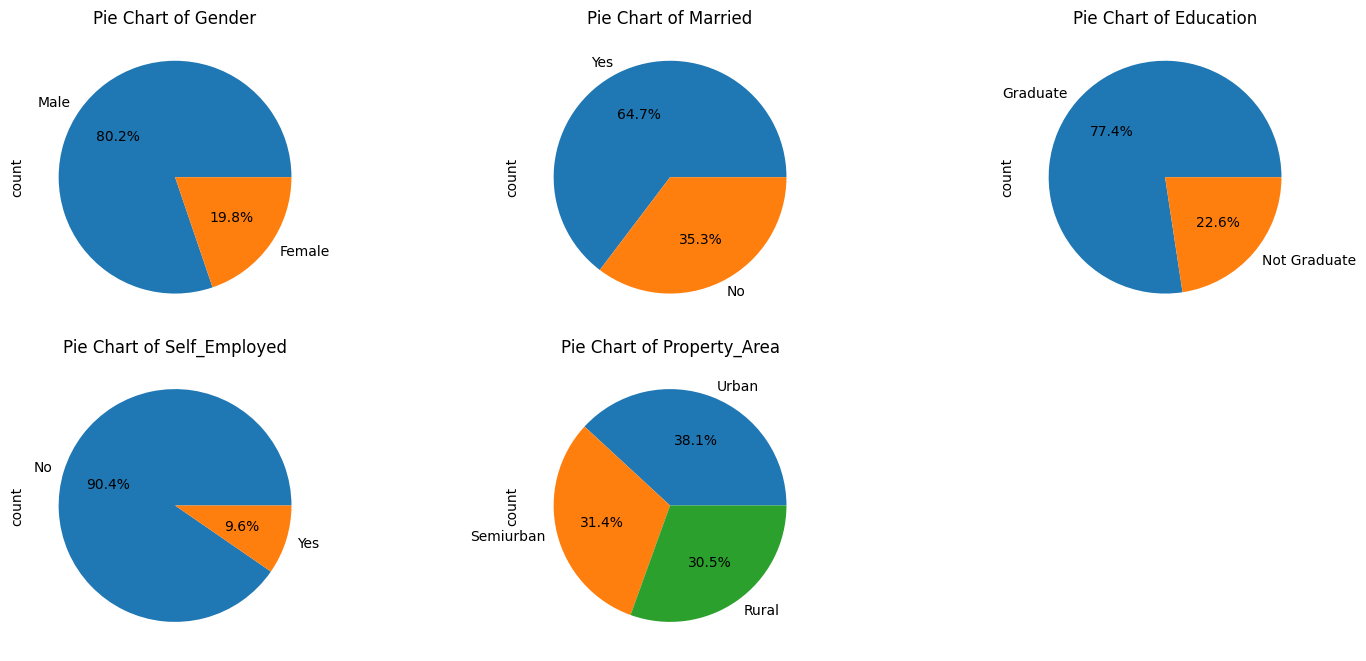

In [96]:
# Pie Charts for categorical variables
plt.figure(figsize=(15, 10))

for i, col in enumerate(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']):
  plt.subplot(3, 3, i + 1)
  Data[col].value_counts().plot(kind='pie', autopct='%1.1f%%')
  plt.title(f'Pie Chart of {col}')

plt.tight_layout()
plt.show()


# Insights from pie charts:
# - Proportion:  Visualize the percentage or proportion of each category within the variable.
# - Composition:  Understand how the different categories contribute to the whole.
# - Dominant categories:  Quickly see the largest categories.

**Since we have seen the univaiate analysis of the dataset now we will move on to the Bivariate Analysys**

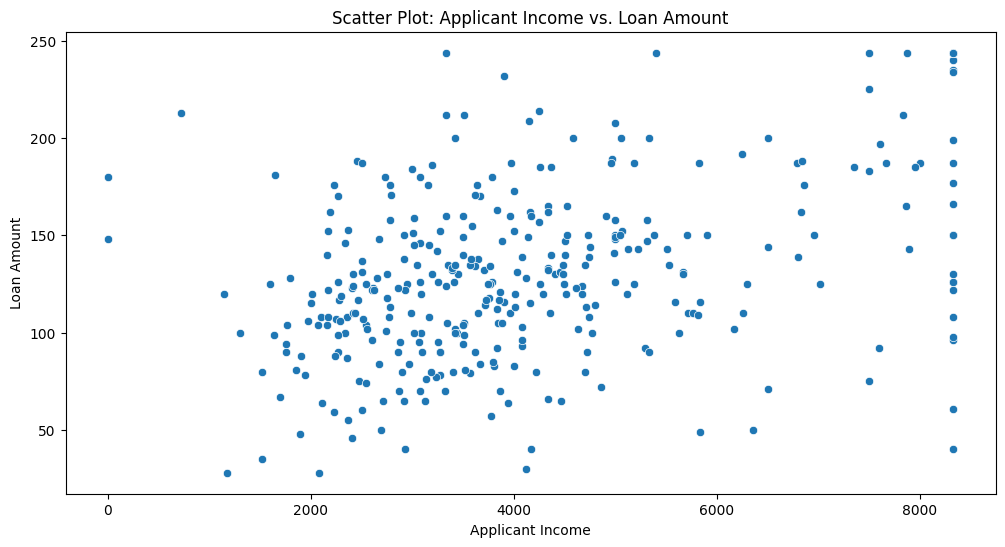

In [97]:
# Bivariate Analysis: Scatter Plots for Numeric Variables
plt.figure(figsize=(12, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=Data)
plt.title('Scatter Plot: Applicant Income vs. Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

# Insights from Scatter Plot:
# - Correlation: Observe if there is a positive, negative, or no correlation between the variables.
# - Outliers: Look for any data points that are far away from the general trend.
# - Clusters:  Identify if there are any distinct groups or patterns in the data.

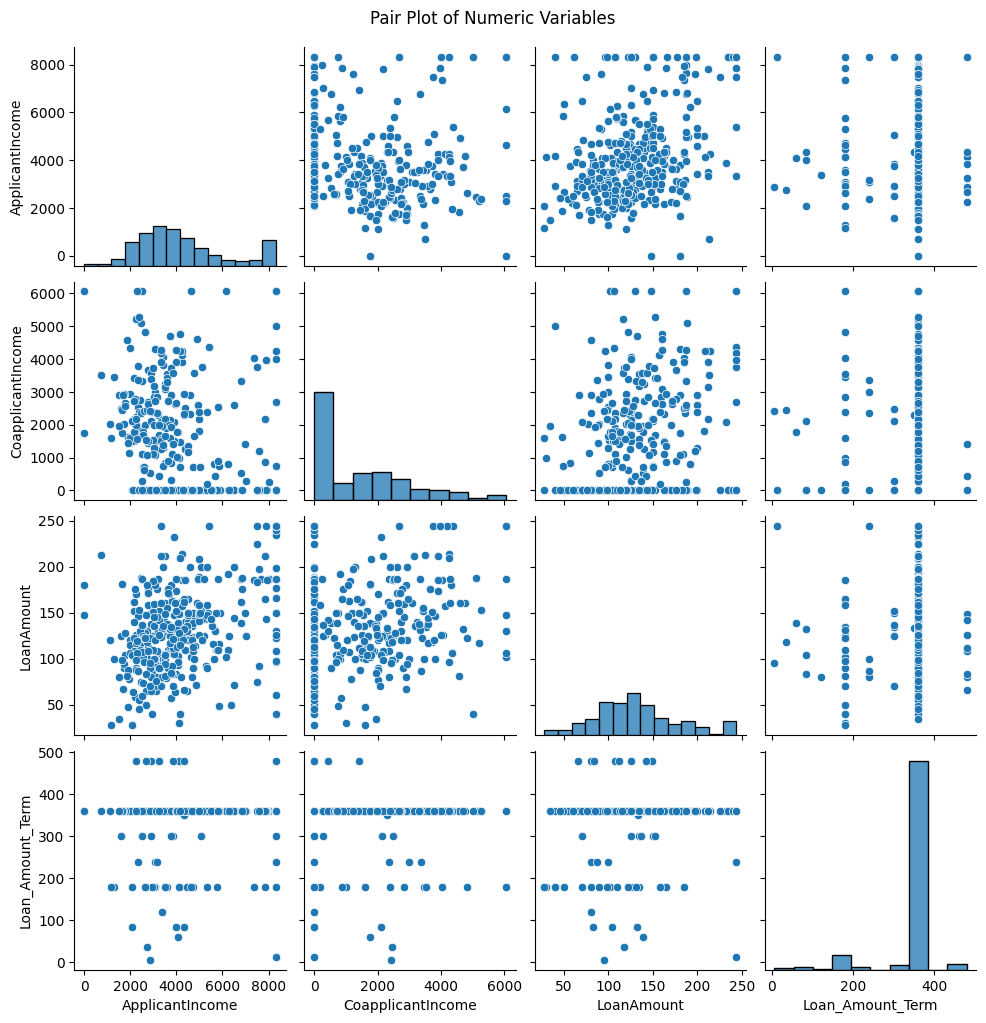

In [98]:
# Bivariate Analysis: Pair Plots (Scatter Matrix)
sns.pairplot(Data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.show()

# Insights from Pair Plot:
# - Correlation: Identify relationships between multiple variables simultaneously.
# - Outliers:  Detect outliers in different combinations of variables.
# - Density: Get a sense of the distribution of data within each variable.

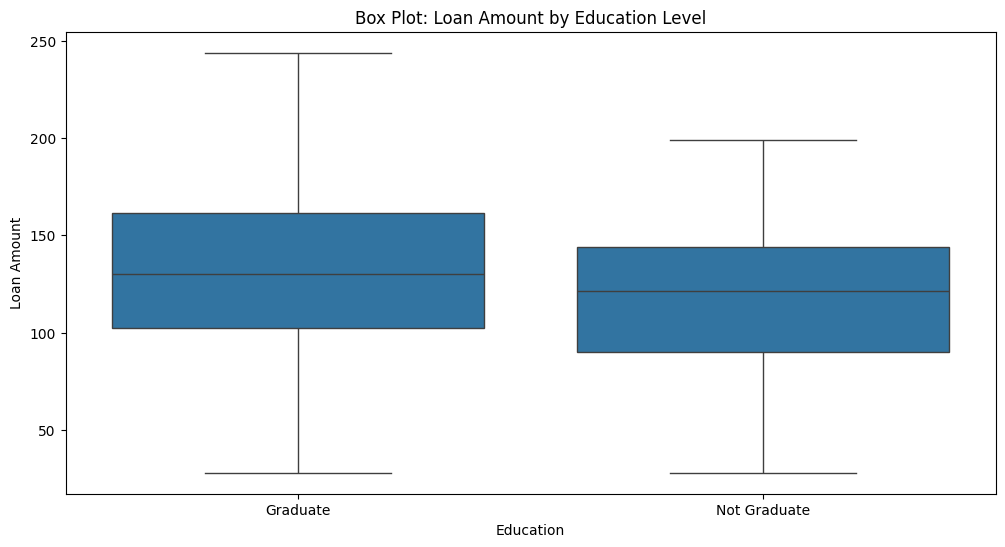

In [99]:
# Bivariate Analysis: Box Plots for Categorical vs. Numeric Variables
plt.figure(figsize=(12, 6))
sns.boxplot(x='Education', y='LoanAmount', data=Data)
plt.title('Box Plot: Loan Amount by Education Level')
plt.xlabel('Education')
plt.ylabel('Loan Amount')
plt.show()

# Insights from Box Plot:
# - Distribution: Compare the distribution of the numeric variable (LoanAmount) across different categories of the categorical variable (Education).
# - Median: Observe the median loan amount for each education level.
# - Spread:  Compare the spread (IQR) of the loan amounts between different education levels.
# - Outliers: Identify potential outliers within each education category.

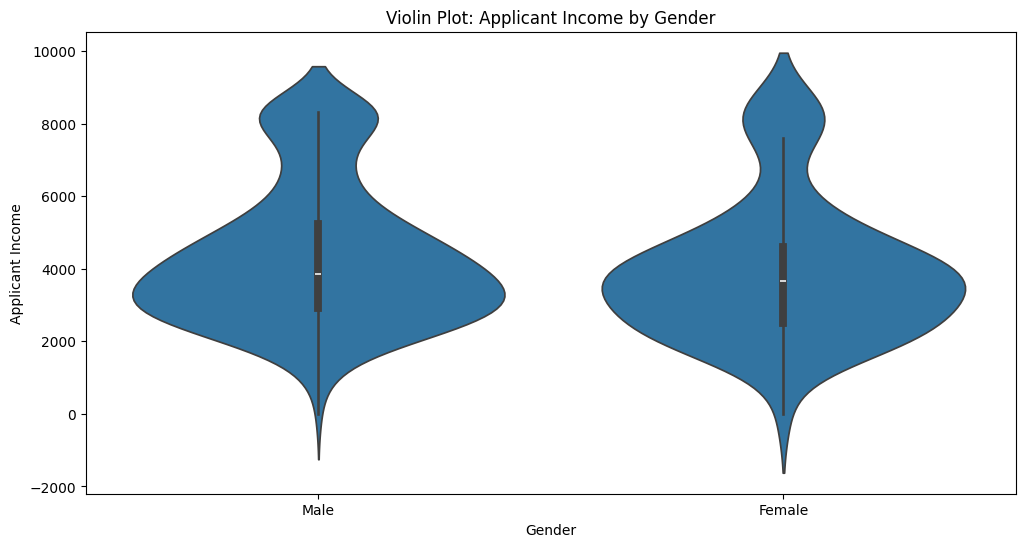

In [100]:
# Bivariate Analysis: Violin Plots for Categorical vs. Numeric Variables
plt.figure(figsize=(12, 6))
sns.violinplot(x='Gender', y='ApplicantIncome', data=Data)
plt.title('Violin Plot: Applicant Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Applicant Income')
plt.show()

# Insights from Violin Plot:
# - Distribution: Similar to box plots, but provide a more detailed view of the distribution of the numeric variable within each category.
# - Density:  Show the density of data at different values within each category.
# - Skewness: Observe if the distribution of the numeric variable is skewed for different categories.

**Since we have looked at the bivariate analysis of the dataset now lets move on to the Multivariate analysis**

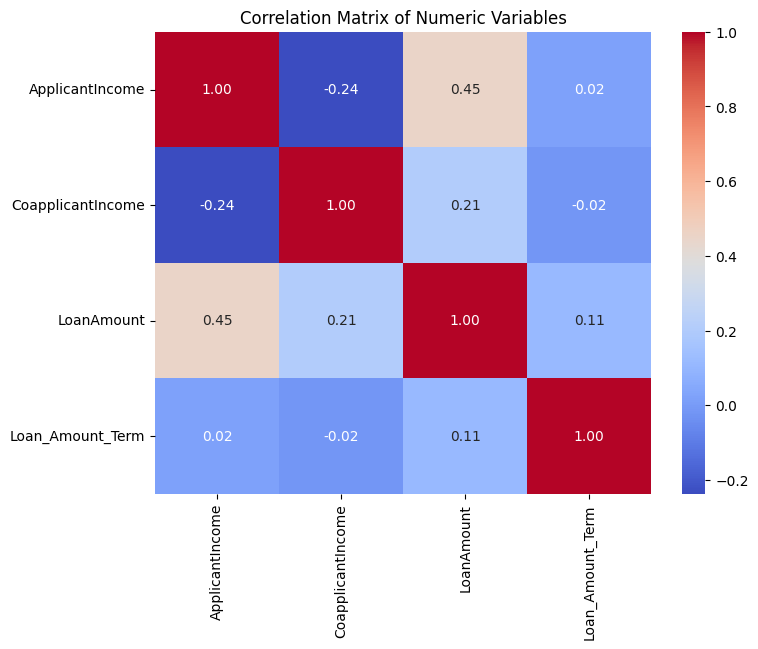

In [103]:
# Multivariate Analysis: Correlation Analysis and Heatmap

# Select the numeric variables for correlation analysis
numeric_vars = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Calculate the correlation matrix
correlation_matrix = Data[numeric_vars].corr()

# Visualize the correlations using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

# Insights from the Correlation Matrix and Heatmap:
# - Strength of relationships: Identify the strength and direction (positive or negative) of the linear relationships between pairs of variables.
# - Multicollinearity: Check for high correlations between independent variables (if you're building a predictive model), as it might indicate potential issues.
# - Important variables:  Notice variables that are strongly correlated with your target variable (if you have one).

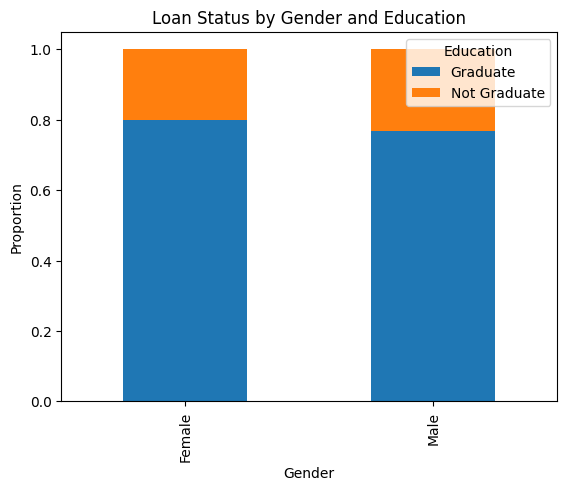

In [61]:
# Multivariate Analysis: Stacked Bar Chart for Categorical Variables
# Example: Loan Status by Gender and Education
pd.crosstab(Data['Gender'], Data['Education'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Loan Status by Gender and Education')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.show()


# Insights from Stacked Bar Chart:
# - Distribution across categories: Compare the distribution of a categorical variable (e.g., Loan Status) across multiple categories of other categorical variables (e.g., Gender and Education).
# - Proportions:  Understand the proportions of different categories within each group.
# - Interaction effects:  Observe if there are any significant differences in the distribution of one variable across different levels of the other variables.